# **Amin fathi 400722102**

In [ ]:
from torchvision import datasets as dt
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
import torch.nn as nn
import torch.optim as optim

## Dataset

In [ ]:
# load the training data
mnist = dt.MNIST('data', train=True, download=True)
mnist = list(mnist)[:2500]

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



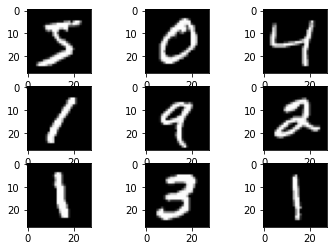

In [ ]:
# plot the first 9 images in the training data
import matplotlib.pyplot as plt
for k, (image, label) in enumerate(mnist[:9]):
  plt.subplot(3, 3, k+1)
  plt.imshow(image, cmap='gray')

In [ ]:
# transform the image data type to tensor
img_to_tensor = transforms.ToTensor()

In [ ]:
# convert the last image we saw into a tensor
img_tensor = img_to_tensor(image)
img_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
# load the training data as tensor
mnist_train = dt.MNIST('data', train=True, transform=img_to_tensor)
mnist_train = list(mnist_train)[:2500]

In [ ]:
#split data into training and validation
mnist_train, mnist_val = mnist_train[:2000], mnist_train[2000:]

## Linear Model in PyTorch

In [ ]:
# assume 50 features, 1 linear output
simple_model = nn.Linear(50, 1)

In [ ]:
weight, bias = list(simple_model.parameters())

In [ ]:
# By default, PyTorch initializes these values to a random number close to 0
print(weight)
print(weight.shape)
print(bias)
print(bias.shape)

Parameter containing:
tensor([[ 0.0262, -0.0669,  0.1161,  0.0688,  0.1288, -0.0721, -0.0488,  0.0875,
         -0.0211,  0.0051, -0.0231,  0.0899,  0.1066,  0.1147, -0.1024, -0.0070,
         -0.0495, -0.0105, -0.0412, -0.0721, -0.0859,  0.0902, -0.0843,  0.0431,
          0.1270,  0.0502,  0.0176,  0.0374, -0.0761, -0.1033,  0.1074, -0.0816,
          0.0445,  0.1096,  0.0784, -0.0646, -0.0157,  0.1134, -0.0135,  0.1326,
          0.0551, -0.0579, -0.0157,  0.0486,  0.0853,  0.1044,  0.0157,  0.0280,
         -0.0675, -0.0110]], requires_grad=True)
torch.Size([1, 50])
Parameter containing:
tensor([0.0283], requires_grad=True)
torch.Size([1])


<font color='red'>Like the example above, create the model to solve the MNIST digitclassification problem.</font>

In [ ]:
model = nn.Linear(784, 10) # 784 = 28*28

# Let's verify that the shapes of the weights and biases are what we expect
weight, bias = list(model.parameters())
print(weight.shape)
print(bias.shape)

torch.Size([10, 784])
torch.Size([10])


## Prediction

In [ ]:
def run_gradient_descent(model,
                         batch_size=64,
                         learning_rate=0.01,
                         weight_decay=0,
                         num_epochs=10):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    iters, losses = [], []
    iters_sub, train_acc, val_acc  = [], [] ,[]

    train_loader = torch.utils.data.DataLoader(
        mnist_train,
        batch_size=batch_size,
        shuffle=True)

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for xs, ts in iter(train_loader):
            if len(ts) != batch_size:
                continue
            xs = xs.view(-1, 784)    # flatten the image. The -1 is a wildcard
            zs = model(xs)
            loss = criterion(zs, ts) # compute the total loss
            loss.backward()          # compute updates for each parameter
            optimizer.step()         # make the updates for each parameter
            optimizer.zero_grad()    # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)  # compute *average* loss

            if n % 10 == 0:
                iters_sub.append(n)
                train_acc.append(get_accuracy(model, mnist_train))
                val_acc.append(get_accuracy(model, mnist_val))
            # increment the iteration numberو
            n += 1

    # plotting
    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve (batch_size={}, lr={})".format(batch_size, learning_rate))
    plt.plot(iters_sub, train_acc, label="Train")
    plt.plot(iters_sub, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()

    return model

def get_accuracy(model, data):
    loader = torch.utils.data.DataLoader(data, batch_size=500)

    correct, total = 0, 0
    for xs, ts in loader:
        xs = xs.view(-1, 784) # flatten the image
        zs = model(xs)
        pred = zs.max(1, keepdim=True)[1] # get the index of the max logit
        correct += pred.eq(ts.view_as(pred)).sum().item()
        total += int(ts.shape[0])
        return correct / total

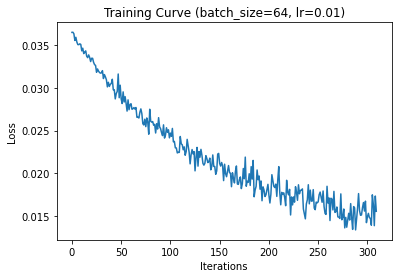

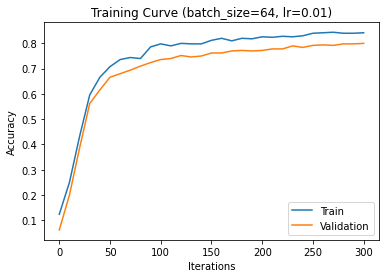

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
model = nn.Linear(784, 10)
run_gradient_descent(model, batch_size=64, learning_rate=0.01, num_epochs=10)